<a href="https://colab.research.google.com/github/JayabrataBasu/Image-Classifier-Using-Neural-Networks/blob/main/NeuralNetworkProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Prerequisite libraries
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

In [ ]:
#Mounting the drive
drive.mount('/content/gdrive')
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
#%cd /content/
#!kaggle datasets download -d moltean/fruits
#!unzip \*.zip && rm *.zip

Mounted at /content/gdrive


In [ ]:
#Pupulating Dataset
%cd /content/gdrive/MyDrive/Kaggle/
!unzip \fruits-360_dataset.zip

In [ ]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Kaggle/fruits-360_dataset/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

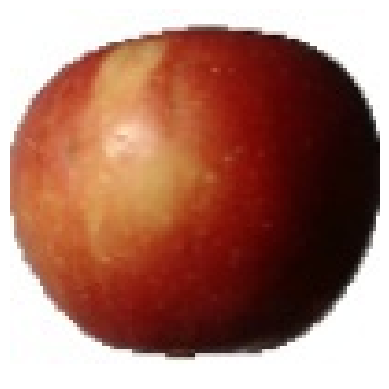

(100, 100, 3)


In [ ]:
#Setting Training & Test dir paths
train_path = '/content/gdrive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/'
test_path = '/content/gdrive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/'
#Displaying demo image
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

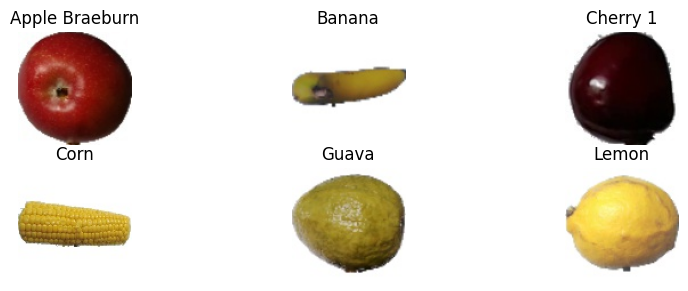

In [ ]:
#Visualizing more demo Images
images = ['Apple Braeburn', 'Banana', 'Cherry 1', 'Corn', 'Guava', 'Lemon']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/r_0_100.jpg", target_size=(100,100)))

In [ ]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i)
        fruits_image.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Cherry Rainier', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Tomato 1', 738),
 ('Tomato 3', 738),
 ('Walnut', 735)]

In [ ]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)


131


In [ ]:
#Defining x
x = img_to_array(img)
print(x.shape)
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))
#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])
#Getting model's summary
model.summary()

(100, 100, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                   

In [ ]:
#Specifing epochs & batch size
epochs = 10
batch_size = 64


In [ ]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

<ipython-input-15-54a208a15b62>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
25/25 [==============================] - 58s 2s/step - loss: 4.7977 - accuracy: 0.0194 - val_loss: 4.5838 - val_accuracy: 0.0286
Epoch 2/10
25/25 [==============================] - 40s 2s/step - loss: 4.2699 - accuracy: 0.0569 - val_loss: 3.8578 - val_accuracy: 0.0924
Epoch 3/10
25/25 [==============================] - 42s 2s/step - loss: 3.8346 - accuracy: 0.0712 - val_loss: 3.4810 - val_accuracy: 0.1341
Epoch 4/10
25/25 [==============================] - 38s 2s/step - loss: 3.4919 - accuracy: 0.1200 - val_loss: 3.1262 - val_accuracy: 0.1589
Epoch 5/10
25/25 [==============================] - 41s 2s/step - loss: 3.2023 - accuracy: 0.1700 - val_loss: 2.7052 - val_accuracy: 0.2891
Epoch 6/10
25/25 [==============================] - 41s 2s/step - loss: 2.8639 - accuracy: 0.2225 - val_loss: 2.4350 - val_accuracy: 0.3424
Epoch 7/10
25/25 [==============================] - 36s 1s/step - loss: 2.5041 - accuracy: 0.3025 - val_loss: 1.9052 - val_accuracy: 0.5117
Epoch 8/10
25/25 [==

In [ ]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [ ]:
#Displaying the selected image
img = load_img('/content/gdrive/MyDrive/Kaggle/fruits-360-original-size/fruits-360-original-size/Test/cabbage_white_1/r0_103.jpg', target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
#Loading the image
def load(filename):
    np_image = load_img(filename, target_size=(100,100))
    np_image = (img_to_array(np_image).astype('float32'))/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('/content/gdrive/MyDrive/Kaggle/fruits-360-original-size/fruits-360-original-size/Test/cabbage_white_1/r0_103.jpg')

#Predicting the class
prediction = (np.argmax(model.predict(image)))
print(prediction)

#Printing class dictionary
print(test_generator.class_indices)